In [23]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.set_palette('colorblind')

In [24]:
from generate_corpora import corpus_from_json
from analysis import *

In [25]:
models = ['grnn', 'gpt2']
constructions = ['cleft', 'intro_topic', 'nointro_topic', 'tough']
all_island_effects = []
all_island_surprisals = []
for model in models:
    for construction in constructions:
        control_filename =  os.path.join("grammar_outputs", "experiment1", model, f"{construction}_grammar_c.json")
        island_filename =  os.path.join("grammar_outputs", "experiment1", model, f"{construction}_grammar_i.json")
        control_tuples = corpus_from_json(control_filename, is_tuples = True)
        island_tuples = corpus_from_json(island_filename, is_tuples = True)
        all_island_effects += island_effects_for_model(model, control_tuples, island_tuples, construction)
        all_island_surprisals += island_surprisals("control", control_tuples, model, construction)
        all_island_surprisals += island_surprisals("island", island_tuples, model, construction)


# wilcox et al analyses are in other notebook
all_island_surprisals = pd.DataFrame(all_island_surprisals)
effects = pd.DataFrame(all_island_effects)

Error analysis (see below graphs for how Tough-mvt has very high wh effects)

In [41]:
tough_grnn_nogap_ctrl = effects[(effects['model'] == 'grnn') & (effects['construction'] == 'tough') &
                (effects['gap'] == "nogap") & (effects['condition'] == 'control')].sort_values("wh_effect", ascending = False)
tough_grnn_nogap_ctrl.to_csv("grammar_outputs/experiment1/debug_grnn_tough_control_nogap.csv", index = False)

In [40]:
tough_grnn_nogap_ctrl.head()

,model,construction,condition,gap,gram,ungram,wh_effect
22803,grnn,tough,control,nogap,it is difficult to find our keys in the park,this snack is difficult to find our keys in th...,11.842591
22801,grnn,tough,control,nogap,it is difficult to find our keys with a friend,this snack is difficult to find our keys with ...,11.842591
22805,grnn,tough,control,nogap,it is difficult to find our keys on Saturdays,this snack is difficult to find our keys on Sa...,11.842591
23155,grnn,tough,control,nogap,it is difficult to lose your hat with a friend,her book is difficult to lose your hat with a ...,10.855704
23157,grnn,tough,control,nogap,it is difficult to lose your hat in the park,her book is difficult to lose your hat in the ...,10.855704


/var/folders/23/7hcv_qtd60j5mx97z8mfdjgh0000gn/T/ipykernel_20506/965314564.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tough_grnn_nogap_ctrl['wh_effect'])


<Axes: xlabel='wh_effect', ylabel='Density'>

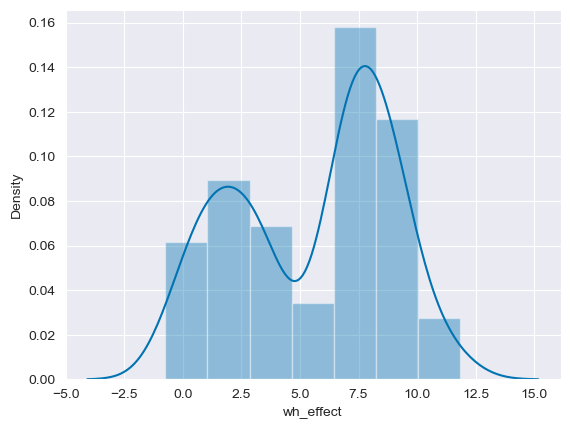

In [37]:
sns.distplot(tough_grnn_nogap_ctrl['wh_effect'])

In [28]:
from surprisal import grnn_surprisal

<Axes: >

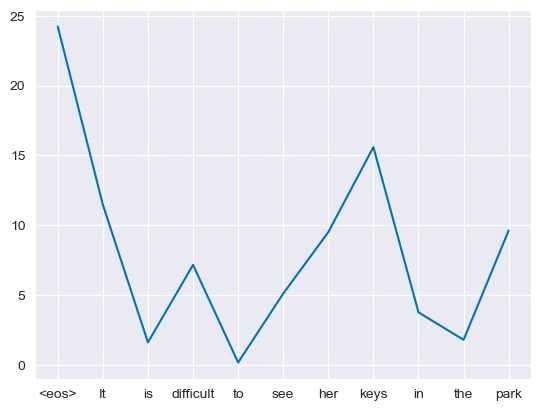

In [19]:
grnn_values = grnn_surprisal("It is difficult to see her keys in the park")
word = [result[0] for result in grnn_values]
surprisal = [result[1] for result in grnn_values]
sns.lineplot(x = word, y = surprisal)

<Axes: >

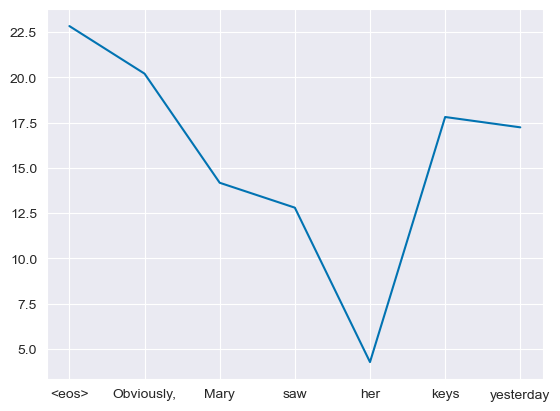

In [22]:
grnn_values = grnn_surprisal("Obviously, Mary saw her keys yesterday")
word = [result[0] for result in grnn_values]
surprisal = [result[1] for result in grnn_values]
sns.lineplot(x = word, y = surprisal)

In [20]:
grnn_values

[('<eos>', 24.22831597806627),
 ('It', 11.4719733948502),
 ('is', 1.6158241281024235),
 ('difficult', 7.164327378342451),
 ('to', 0.1783828024831015),
 ('see', 5.110744802109265),
 ('her', 9.50845847683917),
 ('keys', 15.597074961940356),
 ('in', 3.7663509168698623),
 ('the', 1.8010463473939529),
 ('park', 9.62793000887934)]

In [14]:
grnn_surprisal("It is impossible to finish these books in a day")

[('<eos>', 24.35665355972372),
 ('It', 11.4719733948502),
 ('is', 1.6158241281024235),
 ('impossible', 7.680033179358462),
 ('to', 0.3774093919777008),
 ('finish', 10.250701889363484),
 ('these', 7.192130093680932),
 ('books', 7.033652896425078),
 ('in', 3.2271426547175435),
 ('a', 2.612144390052398),
 ('day', 9.181552478217936)]

In [13]:
grnn_surprisal("These books are impossible to finish these books in a day")

[('<eos>', 25.611037228946355),
 ('These', 13.519605715328836),
 ('books', 9.267421352001927),
 ('are', 2.569625635227539),
 ('impossible', 12.774792882000632),
 ('to', 0.7806707000851464),
 ('finish', 11.310280122023213),
 ('these', 11.058323474717389),
 ('books', 4.932283220823153),
 ('in', 4.5435257256109205),
 ('a', 3.2695841893321655),
 ('day', 9.778092188931279)]

Potential issue w materials: comparing w Ozaki et al - the same item should be moved earlier in the sentence

In [4]:
pd.DataFrame(all_island_effects)['condition'].value_counts()

island     49572
control     5508
Name: condition, dtype: int64

In [29]:
grnn_cnp_control = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_obj_grnn.json", is_tuples = True)
grnn_cnp_island = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_that_grnn.json", is_tuples = True)
gpt2_cnp_control = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_obj_gpt2.json", is_tuples = True)
gpt2_cnp_island = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_that_gpt2.json", is_tuples = True)
grnn_cnp_island_effects = island_effects_for_model("grnn", grnn_cnp_control, grnn_cnp_island, "wh_movement")
gpt2_cnp_island_effects = island_effects_for_model("gpt2", gpt2_cnp_control, gpt2_cnp_island, "wh_movement")


In [30]:
construction_map = {
    "wh_movement": "Wh-Movement",
    "cleft": "Clefting",
    "intro_topic": "Topicalization with \n Intro",
    "nointro_topic": "Topicalization without \n Intro",
    "tough": "Tough Movement"
}
island_effects = pd.DataFrame(grnn_cnp_island_effects + gpt2_cnp_island_effects + all_island_effects)

island_effects["construction"] = island_effects['construction'].apply(lambda const: construction_map[const])


In [31]:
island_effects[(island_effects['model'] == 'grnn') & (island_effects['construction'] == 'Tough Movement') &
                (island_effects['gap'] == "-gap") & (island_effects['condition'] == 'control')].sort_values("wh_effect")

,model,construction,condition,gap,gram,ungram,wh_effect


Text(0.5, 1.05, 'GPT2 Filler Effects')

<Figure size 4000x2200 with 0 Axes>

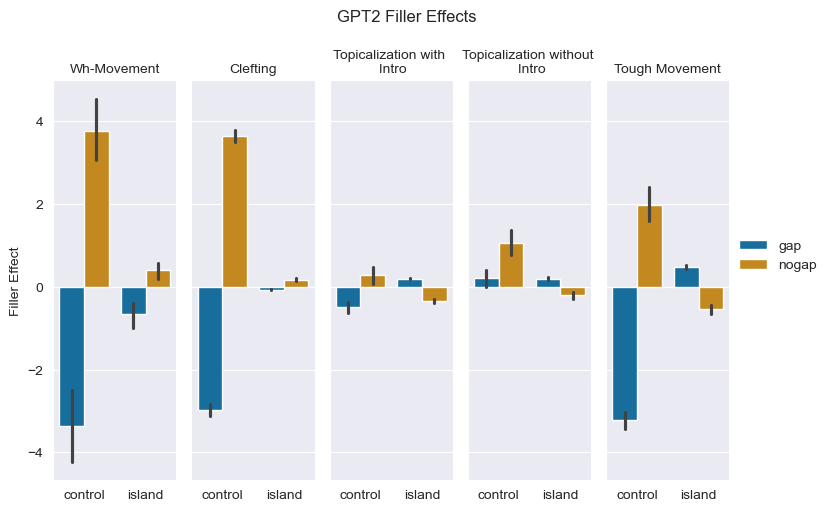

In [32]:
gpt2 = island_effects[island_effects['model'] == 'gpt2']
plt.figure(figsize=(40, 22))
g = sns.catplot(x="condition", y="wh_effect", hue="gap", data=gpt2, kind="bar", col = "construction",
            estimator="mean", aspect = 0.3)
g.set_titles(template='{col_name}')
g.set_axis_labels("", "Filler Effect")
g.legend.set_title("")
plt.suptitle("GPT2 Filler Effects", y = 1.05)
#plt.savefig("figures/gpt2_expt1.png")

<Figure size 2400x1500 with 0 Axes>

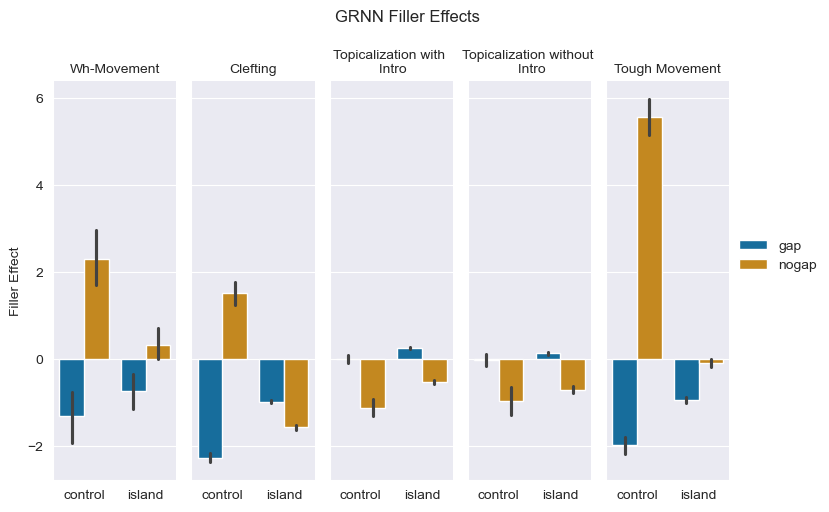

In [33]:
grnn = island_effects[island_effects['model'] == 'grnn']
plt.figure(figsize=(24, 15))
g = sns.catplot(x="condition", y="wh_effect", hue="gap", data=grnn, kind="bar", col = "construction",
            estimator="mean", aspect = 0.3)
g.set_titles(template='{col_name}')
g.set_axis_labels("", "Filler Effect")
g.legend.set_title("")
plt.suptitle("GRNN Filler Effects", y = 1.05)
plt.savefig("figures/grnn_expt1.png")

In [87]:
island_formula = "surprisal~wh*gap*island+(gap||item)"
effects = interaction_effects(island_formula, constructions, models, all_island_surprisals)

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -44616.895 	 AIC: 89255.791

Random effects:

                 Name     Var    Std
item      (Intercept)   5.400  2.324
item.1            gap  11.249  3.354
Residual                2.103  1.450

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -44616.895 	 AIC: 89255.791

Random effects:

                 Name     Var    Std
item      (Intercept)   5.400  2.324
item.1            gap  11.249  3.354
Residual                2.103  1.450

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

F

In [88]:
pd.DataFrame(effects).reset_index()[['Estimate', 'P-val', 'model', 'condition']]

,Estimate,P-val,model,condition
0,4.449,0.000,grnn,cleft
1,-0.069,0.520,grnn,intro_topic
2,-0.164,0.374,grnn,nointro_topic
3,6.729,0.000,grnn,tough
4,6.388,0.000,gpt2,cleft
5,1.322,0.000,gpt2,intro_topic
6,1.273,0.000,gpt2,nointro_topic
7,6.245,0.000,gpt2,tough
